# DSSIM Gathering Notebook

This notebook opens original and compressed NetCDF files at a given data path, computes the DSSIM on the compressed files for specified time steps, and stores the values in a CSV file in the lcr/data/ directory.

In [2]:
# Make sure you are using the cmip6-2019.10 kernel

# Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys

sys.path.insert(0, '/glade/u/home/apinard/newldcpy/ldcpy')
import ldcpy

# Display output of plots directly in Notebook
%matplotlib inline
# Automatically reload module if it is edited
%reload_ext autoreload
%autoreload 2

# silence warnings
import warnings

warnings.filterwarnings("ignore")
import os
hdf_pp = os.environ["HDF5_PLUGIN_PATH"]
env_list = ['export HDF5_PLUGIN_PATH='+hdf_pp]

In [3]:
# from dask.distributed import Client

# from ncar_jobqueue import NCARCluster
# cluster = NCARCluster(project='NTDD0004', env_extra=env_list)

# # scale as needed
# cluster.adapt(minimum_jobs=1, maximum_jobs=30)
# cluster

In [4]:
# start the dask scheduler

# Note: This notebook should run on Cheyenne for now, running on casper will work for
# the most part but trying to plot the LHFLX variable will result in a timeout,
# presumably due to the large file sizes for the variable.

# for Cheyenne

from dask_jobqueue import PBSCluster



cluster = PBSCluster(
    queue="regular",
    walltime="02:00:00",
    project="NIOW0001",
    memory="109GB",
    resource_spec="select=1:ncpus=9:mem=109GB",
    cores=36,
    processes=9,
    env_extra=env_list
)


# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster

In [5]:
from dask.distributed import Client

# Connect client to the remote dask workers
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/{port}/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/{port}/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.10.19:32863,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/apinard/proxy/{port}/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [ ]:
import time

monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/"


for variable in daily_variables:
    print(variable)
    levels[variable] = [f"bg_2_{variable}",
                        f"bg_3_{variable}",
                        f"bg_4_{variable}", f"bg_5_{variable}",
                        f"bg_6_{variable}", f"bg_7_{variable}",]
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/bg/bg_2/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/bg/bg_3/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/bg/bg_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/bg/bg_5/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/bg/bg_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/bg/bg_7/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = [f"bg_2_{variable}",
                        f"bg_3_{variable}",
                        f"bg_4_{variable}", f"bg_5_{variable}",
                        f"bg_6_{variable}", f"bg_7_{variable}",]
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/bg/bg_2/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/bg/bg_3/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/bg/bg_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/bg/bg_5/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/bg/bg_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/bg/bg_7/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



In [ ]:
# Rerun on zfp
import time

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/"
monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

for variable in daily_variables:
    print(variable)
    levels[variable] = [f"zfp_p_8_{variable}",
                        f"zfp_p_10_{variable}",
                        f"zfp_p_12_{variable}", f"zfp_p_14_{variable}",
                        f"zfp_p_16_{variable}", f"zfp_p_18_{variable}", f"zfp_p_20_{variable}",
                        f"zfp_p_22_{variable}", f"zfp_p_24_{variable}"]
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_all/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = [f"zfp_p_8_{variable}",
                        f"zfp_p_10_{variable}",
                        f"zfp_p_12_{variable}", f"zfp_p_14_{variable}",
                        f"zfp_p_16_{variable}", f"zfp_p_18_{variable}", f"zfp_p_20_{variable}",
                        f"zfp_p_22_{variable}", f"zfp_p_24_{variable}"]
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_all/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



In [ ]:
# Rerun on sz 1.4
import time

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/"
monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

for variable in daily_variables:
    print(variable)
    levels[variable] = [f"sz1.4_1_{variable}",
                        f"sz1.4_05_{variable}",
                        f"sz1.4_01_{variable}", f"sz1.4_005_{variable}",
                        f"sz1.4_001_{variable}", f"sz1.4_0005_{variable}", f"sz1.4_0001_{variable}",
                        f"sz1.4_00005_{variable}", f"sz1.4_00001_{variable}",
                        f"sz1.4_000005_{variable}", f"sz1.4_000001_{variable}"]
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.1/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.005/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.001/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.0005/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.0001/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn5e-05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn1e-05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn5e-06/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn1e-06/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = [f"sz1.4_1_{variable}",
                        f"sz1.4_05_{variable}",
                        f"sz1.4_01_{variable}", f"sz1.4_005_{variable}",
                        f"sz1.4_001_{variable}", f"sz1.4_0005_{variable}", f"sz1.4_0001_{variable}",
                        f"sz1.4_00005_{variable}", f"sz1.4_00001_{variable}",
                        f"sz1.4_000005_{variable}", f"sz1.4_000001_{variable}"]
    sets[variable] = [f"{data_path}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.1/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.005/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.001/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.0005/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn0.0001/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn5e-05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn1e-05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn5e-06/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4/sz2_1_12ROn1e-06/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



In [ ]:
# This one is for sz 1.4

import matplotlib as mpl
import matplotlib.pyplot as plt
for variable in ["FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS"]:
    for time in range(0,cols_monthly[variable].dims["time"]):
        for i in [f"sz1.4_1", f"sz1.4_05", f"sz1.4_01", f"sz1.4_005",
                  f"sz1.4_001", f"sz1.4_0005", f"sz1.4_0001", f"sz1.4_00005",
                  f"sz1.4_00001", f"sz1.4_000005", f"sz1.4_000001"]:
            ldcpy.save_metrics(cols_monthly[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims_sz14.csv")

for variable in daily_variables:
    for time in range(0,60):
    #for time in range(0,cols_daily[variable].dims["time"]):
            for i in [f"sz1.4_1", f"sz1.4_05", f"sz1.4_01", f"sz1.4_005",
                  f"sz1.4_001", f"sz1.4_0005", f"sz1.4_0001", f"sz1.4_00005",
                  f"sz1.4_00001", f"sz1.4_000005", f"sz1.4_000001"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims_sz14.csv")



In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#for variable in ["FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
#            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS"]:
#    for time in range(0,cols_monthly[variable].dims["time"]):
#        for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
#            ldcpy.save_metrics(cols_monthly[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")

daily_variables = ["TS", "Z500"]
for variable in daily_variables:
    if variable == "TAUX":
        for time in range(160,cols_daily[variable].dims["time"]):
            for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")
    else:
        for time in range(0,cols_daily[variable].dims["time"]):
            for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")



In [ ]:
# Repeat for zfp again

import matplotlib as mpl
import matplotlib.pyplot as plt
#for variable in ["FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
#            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS"]:
#    for time in range(0,cols_monthly[variable].dims["time"]):
#        for i in ["zfp_p_8", "zfp_p_10", "zfp_p_12", "zfp_p_14", "zfp_p_16", "zfp_p_18", "zfp_p_20", "zfp_p_22", "zfp_p_24"]:
#            ldcpy.save_metrics(cols_monthly[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")

for variable in daily_variables:
    for time in range(0,60):
        for i in ["zfp_p_8", "zfp_p_10", "zfp_p_12", "zfp_p_14", "zfp_p_16", "zfp_p_18", "zfp_p_20", "zfp_p_22", "zfp_p_24"]:
            ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")



In [ ]:
for variable in ["CCN3", "CLOUD", "U"]:
    for time in range(17,cols_monthly[variable].dims["time"]):
        for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
            ldcpy.save_metrics(cols_monthly[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")

In [ ]:
import time

monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/"


for variable in daily_variables:
    print(variable)
    levels[variable] = [f"sz1ROn_0.1_{variable}",
                        f"sz1ROn_0.05_{variable}",
                        f"sz1ROn_0.01_{variable}", f"sz1ROn_0.005_{variable}",
                        f"sz1ROn_0.001_{variable}", f"sz1ROn_0.0005_{variable}",
                        f"sz1ROn_0.0001_{variable}", f"sz1ROn_5e-05_{variable}",
                        f"sz1ROn_1e-05_{variable}", f"sz1ROn_5e-06_{variable}",
                        f"sz1ROn_1e-06_{variable}"]
    sets[variable] = [f"{data_path}/../orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.1/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.005/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.001/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.0005/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.0001/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn5e-05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn1e-05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn5e-06/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn1e-06/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = [f"sz1ROn_0.1_{variable}",
                        f"sz1ROn_0.05_{variable}",
                        f"sz1ROn_0.01_{variable}", f"sz1ROn_0.005_{variable}",
                        f"sz1ROn_0.001_{variable}", f"sz1ROn_0.0005_{variable}",
                        f"sz1ROn_0.0001_{variable}", f"sz1ROn_5e-05_{variable}",
                        f"sz1ROn_1e-05_{variable}", f"sz1ROn_5e-06_{variable}",
                        f"sz1ROn_1e-06_{variable}"]
    sets[variable] = [f"{data_path}/../orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.1/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.01/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.005/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.001/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.0005/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn0.0001/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn5e-05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn1e-05/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn5e-06/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/sz1.4.13.true/sz1ROn1e-06/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



In [ ]:
# This one is for sz 1.4


import matplotlib as mpl
import matplotlib.pyplot as plt
# for variable in ["FLNS", "FLNT", "FSNS", "FSNT", "LHFLX", 
#                  "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS"]:
#     for time in range(0,cols_monthly[variable].dims["time"]):
#         for i in [f"sz1ROn_0.1",
#                         f"sz1ROn_0.05",
#                         f"sz1ROn_0.01", f"sz1ROn_0.005",
#                         f"sz1ROn_0.001", f"sz1ROn_0.0005",
#                         f"sz1ROn_0.0001", f"sz1ROn_5e-05",
#                         f"sz1ROn_1e-05", f"sz1ROn_5e-06",
#                         f"sz1ROn_1e-06"]:
#             ldcpy.save_metrics(cols_monthly[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims_sz1413.csv")

#for variable in daily_variables:
for variable in ["Z500"]:
    for time in range(0,60):
    #for time in range(0,cols_daily[variable].dims["time"]):
            for i in [f"sz1ROn_0.1",
                        f"sz1ROn_0.05",
                        f"sz1ROn_0.01", f"sz1ROn_0.005",
                        f"sz1ROn_0.001", f"sz1ROn_0.0005",
                        f"sz1ROn_0.0001", f"sz1ROn_5e-05",
                        f"sz1ROn_1e-05", f"sz1ROn_5e-06",
                        f"sz1ROn_1e-06"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims_sz1413.csv")



In [4]:
import time

monthly_variables = ["CCN3", "CLOUD", "FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS", "U"]
daily_variables = ["FLUT", "LHFLX", "PRECT", "TAUX", "TS", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/"


for variable in daily_variables:
    print(variable)
    levels[variable] = [f"zfp5_p_6_{variable}",
                        f"zfp5_p_8_{variable}",
                        f"zfp5_p_10_{variable}", f"zfp5_p_12_{variable}",
                        f"zfp5_p_14_{variable}", f"zfp5_p_16_{variable}",
                        f"zfp5_p_18_{variable}", f"zfp5_p_20_{variable}",
                        f"zfp5_p_22_{variable}", f"zfp5_p_24_{variable}",
                        f"zfp5_p_26_{variable}"]
    sets[variable] = [f"{data_path}/../orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_26/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})

for variable in monthly_variables:
    print(variable)
    levels[variable] = [f"zfp5_p_6_{variable}",
                        f"zfp5_p_8_{variable}",
                        f"zfp5_p_10_{variable}", f"zfp5_p_12_{variable}",
                        f"zfp5_p_14_{variable}", f"zfp5_p_16_{variable}",
                        f"zfp5_p_18_{variable}", f"zfp5_p_20_{variable}",
                        f"zfp5_p_22_{variable}", f"zfp5_p_24_{variable}",
                        f"zfp5_p_26_{variable}"]
    sets[variable] = [f"{data_path}/../orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc",
                      f"{data_path}/zfp_hdf5/zfp_p_26/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{variable}.200601-201012.nc"]
    cols_monthly[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})



FLUT
dataset size in GB 1.94

LHFLX
dataset size in GB 1.94

PRECT
dataset size in GB 1.94

TAUX
dataset size in GB 1.94

TS
dataset size in GB 1.94

Z500
dataset size in GB 1.94

CCN3
dataset size in GB 4.78

CLOUD
dataset size in GB 4.78

FLNS
dataset size in GB 0.16

FLNT
dataset size in GB 0.16

FSNS
dataset size in GB 0.16

FSNT
dataset size in GB 0.16

LHFLX
dataset size in GB 0.16

PRECC
dataset size in GB 0.16

PRECL
dataset size in GB 0.16

PS
dataset size in GB 0.16

QFLX
dataset size in GB 0.16

SHFLX
dataset size in GB 0.16

TMQ
dataset size in GB 0.16

TS
dataset size in GB 0.16

U
dataset size in GB 4.78



In [6]:
# This one is for zfp hdf5


import matplotlib as mpl
import matplotlib.pyplot as plt
# for variable in ["FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
#             "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS"]:
# #for variable in ["PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS"]:
#     for time in range(0,cols_monthly[variable].dims["time"]):
#         for i in [f"zfp5_p_6",
#                         f"zfp5_p_8",
#                         f"zfp5_p_10", f"zfp5_p_12",
#                         f"zfp5_p_14", f"zfp5_p_16",
#                         f"zfp5_p_18", f"zfp5_p_20",
#                         f"zfp5_p_22", f"zfp5_p_24",
#                         f"zfp5_p_26"]:
#             ldcpy.save_metrics(cols_monthly[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims_zfp5.csv")

for variable in ["TAUX", "TS", "Z500"]:
    for time in range(0,60):
    #for time in range(0,cols_daily[variable].dims["time"]):
            for i in [f"zfp5_p_6",
                        f"zfp5_p_8",
                        f"zfp5_p_10", f"zfp5_p_12",
                        f"zfp5_p_14", f"zfp5_p_16",
                        f"zfp5_p_18", f"zfp5_p_20",
                        f"zfp5_p_22", f"zfp5_p_24",
                        f"zfp5_p_26"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims_zfp5_daily.csv")



Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_6_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_8_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_10_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_12_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_14_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_16_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_18_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_20_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_22_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_24_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX data (set1) and zfp5_p_26_TAUX data (set2), time 0 :
Evaluating 4 metrics for orig_TAUX

In [ ]:
cols_daily["TS"]

In [ ]:
cols_daily["TS"].isel(time=0)

In [ ]:

ldcpy.compare_stats(cols_daily["TS"].isel(time=0), "TS", ["orig_TS", "zfp5_p_6_TS"])

In [8]:
import time

daily_variables = ["bc_a1_SRF", "dst_a1_SRF", "dst_a3_SRF", "FLNS", "FLNSC",
                   "FLUT", "FSNS", "FSNSC", "FSNTOA", "ICEFRAC", "LHFLX", "pom_a1_SRF", "PRECL", "PRECSC",
                   "PRECSL", "PRECT", "PRECTMX", "PSL", "Q200", "Q500", "Q850", "QBOT", "SHFLX", "so4_a1_SRF",
                   "so4_a2_SRF", "so4_a3_SRF", "soa_a1_SRF", "soa_a2_SRF", "T010", "T200", "T500", "T850",
                   "TAUX", "TAUY", "TMQ", "TREFHT", "TREFHTMN", "TREFHTMX", "TS", "U010", "U200", "U500", "U850", "VBOT",
                   "WSPDSRFAV", "Z050", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research"


for variable in daily_variables:
    print(variable)
    levels[variable] = [f"bg_2_{variable}",
                        f"bg_3_{variable}",
                        f"bg_4_{variable}", f"bg_5_{variable}",
                        f"bg_6_{variable}", f"bg_7_{variable}",]
    sets[variable] = [f"{data_path}/daily_orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_2/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_3/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_5/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_bg/bg_7/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})


bc_a1_SRF
dataset size in GB 1.13

dst_a1_SRF
dataset size in GB 1.13

dst_a3_SRF
dataset size in GB 1.13

FLNS
dataset size in GB 1.13

FLNSC
dataset size in GB 1.13

FLUT
dataset size in GB 1.13

FSNS
dataset size in GB 1.13

FSNSC
dataset size in GB 1.13

FSNTOA
dataset size in GB 1.13

ICEFRAC
dataset size in GB 1.13

LHFLX
dataset size in GB 1.13

pom_a1_SRF
dataset size in GB 1.13

PRECL
dataset size in GB 1.13

PRECSC
dataset size in GB 1.13

PRECSL
dataset size in GB 1.13

PRECT
dataset size in GB 1.13

PRECTMX
dataset size in GB 1.13

PSL
dataset size in GB 1.13

Q200
dataset size in GB 1.13

Q500
dataset size in GB 1.13

Q850
dataset size in GB 1.13

QBOT
dataset size in GB 1.13

SHFLX
dataset size in GB 1.13

so4_a1_SRF
dataset size in GB 1.13

so4_a2_SRF
dataset size in GB 1.13

so4_a3_SRF
dataset size in GB 1.13

soa_a1_SRF
dataset size in GB 1.13

soa_a2_SRF
dataset size in GB 1.13

T010
dataset size in GB 1.13

T200
dataset size in GB 1.13

T500
dataset size in GB 1.13



In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#for variable in ["FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
#            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS"]:
#    for time in range(0,cols_monthly[variable].dims["time"]):
#        for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
#            ldcpy.save_metrics(cols_monthly[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")

for variable in daily_variables:
    for time in range(24,36):
            for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/daily_allvars_dssims.csv")



Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_2_bc_a1_SRF data (set2), time 24 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_3_bc_a1_SRF data (set2), time 24 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_4_bc_a1_SRF data (set2), time 24 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_5_bc_a1_SRF data (set2), time 24 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_6_bc_a1_SRF data (set2), time 24 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_7_bc_a1_SRF data (set2), time 24 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_2_bc_a1_SRF data (set2), time 25 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_3_bc_a1_SRF data (set2), time 25 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_4_bc_a1_SRF data (set2), time 25 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_5_bc_a1_SRF data (set2), time 25 :
Evaluating 4 metrics for orig_bc_a1_SRF data (set1) and bg_6

In [6]:
import time

# daily_variables = ["bc_a1_SRF", "dst_a1_SRF", "dst_a3_SRF", "FLNS", "FLNSC",
#                    "FLUT", "FSNS", "FSNSC", "FSNTOA", "ICEFRAC", "LHFLX", "pom_a1_SRF", "PRECL", "PRECSC",
#                    "PRECSL", "PRECT", "PRECTMX", "PSL", "Q200", "Q500", "Q850", "QBOT", "SHFLX", "so4_a1_SRF",
#                    "so4_a2_SRF", "so4_a3_SRF", "soa_a1_SRF", "soa_a2_SRF", "T010", "T200", "T500", "T850",
#                    "TAUX", "TAUY", "TMQ", "TREFHT", "TREFHTMN", "TREFHTMX", "TS", "U010", "U200", "U500", "U850", "VBOT",
#                    "WSPDSRFAV", "Z050", "Z500"]

daily_variables = ["TAUY", "TMQ", "TREFHT", "TREFHTMN", "TREFHTMX", "TS", "U010", "U200", "U500", "U850", "VBOT",
                   "WSPDSRFAV", "Z050", "Z500"]

cols_monthly = {}
cols_daily = {}
sets = {}
levels = {}
data_path = "/glade/p/cisl/asap/CAM_lossy_test_data_31/research"


for variable in daily_variables:
    print(variable)
    levels[variable] = [f"zfp_p_8_{variable}",
                        f"zfp_p_10_{variable}",
                        f"zfp_p_12_{variable}", f"zfp_p_14_{variable}",
                        f"zfp_p_16_{variable}", f"zfp_p_18_{variable}", f"zfp_p_20_{variable}",
                        f"zfp_p_22_{variable}", f"zfp_p_24_{variable}"]
    sets[variable] = [f"{data_path}/daily_orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc",
                      f"{data_path}/daily_zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{variable}.20060101-20071231.nc"]
    cols_daily[variable] = ldcpy.open_datasets("cam-fv", [f"{variable}"], sets[variable], [f"orig_{variable}"] + levels[variable], chunks={"time":700})


TAUY
dataset size in GB 1.62

TMQ
dataset size in GB 1.62

TREFHT
dataset size in GB 1.62

TREFHTMN
dataset size in GB 1.62

TREFHTMX
dataset size in GB 1.62

TS
dataset size in GB 1.62

U010
dataset size in GB 1.62

U200
dataset size in GB 1.62

U500
dataset size in GB 1.62

U850
dataset size in GB 1.62

VBOT
dataset size in GB 1.62

WSPDSRFAV
dataset size in GB 1.62

Z050
dataset size in GB 1.62

Z500
dataset size in GB 1.62



In [6]:
cols_daily["TS"].dims["time"]

730

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#for variable in ["FLNS", "FLNT", "FSNS", "FSNT", "LHFLX",
#            "PRECC", "PRECL", "PS", "QFLX", "SHFLX", "TMQ", "TS"]:
#    for time in range(0,cols_monthly[variable].dims["time"]):
#        for i in ["bg_2", "bg_3", "bg_4", "bg_5", "bg_6", "bg_7"]:
#            ldcpy.save_metrics(cols_monthly[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/dssims.csv")
# daily_variables = ["TAUY", "TMQ", "TREFHT", "TREFHTMN", "TREFHTMX", "TS", "U010", "U200", "U500", "U850", "VBOT",
#                    "WSPDSRFAV", "Z050", "Z500"]

for variable in daily_variables:
    for time in range(12,36):
        for i in ["zfp_p_8", "zfp_p_10", "zfp_p_12", "zfp_p_14", "zfp_p_16", "zfp_p_18", "zfp_p_20", "zfp_p_22", "zfp_p_24"]:
                ldcpy.save_metrics(cols_daily[variable], variable, f"orig_{variable}", f"{i}_{variable}", time=time, location="../data/daily_allvars_dssims.csv")

Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_8_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_10_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_12_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_14_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_16_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_18_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_20_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_22_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_24_TAUY data (set2), time 12 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_8_TAUY data (set2), time 13 :
Evaluating 4 metrics for orig_TAUY data (set1) and zfp_p_10_TAUY data (set2), time 13 :
Evaluating 4 metrics for orig_TAUY

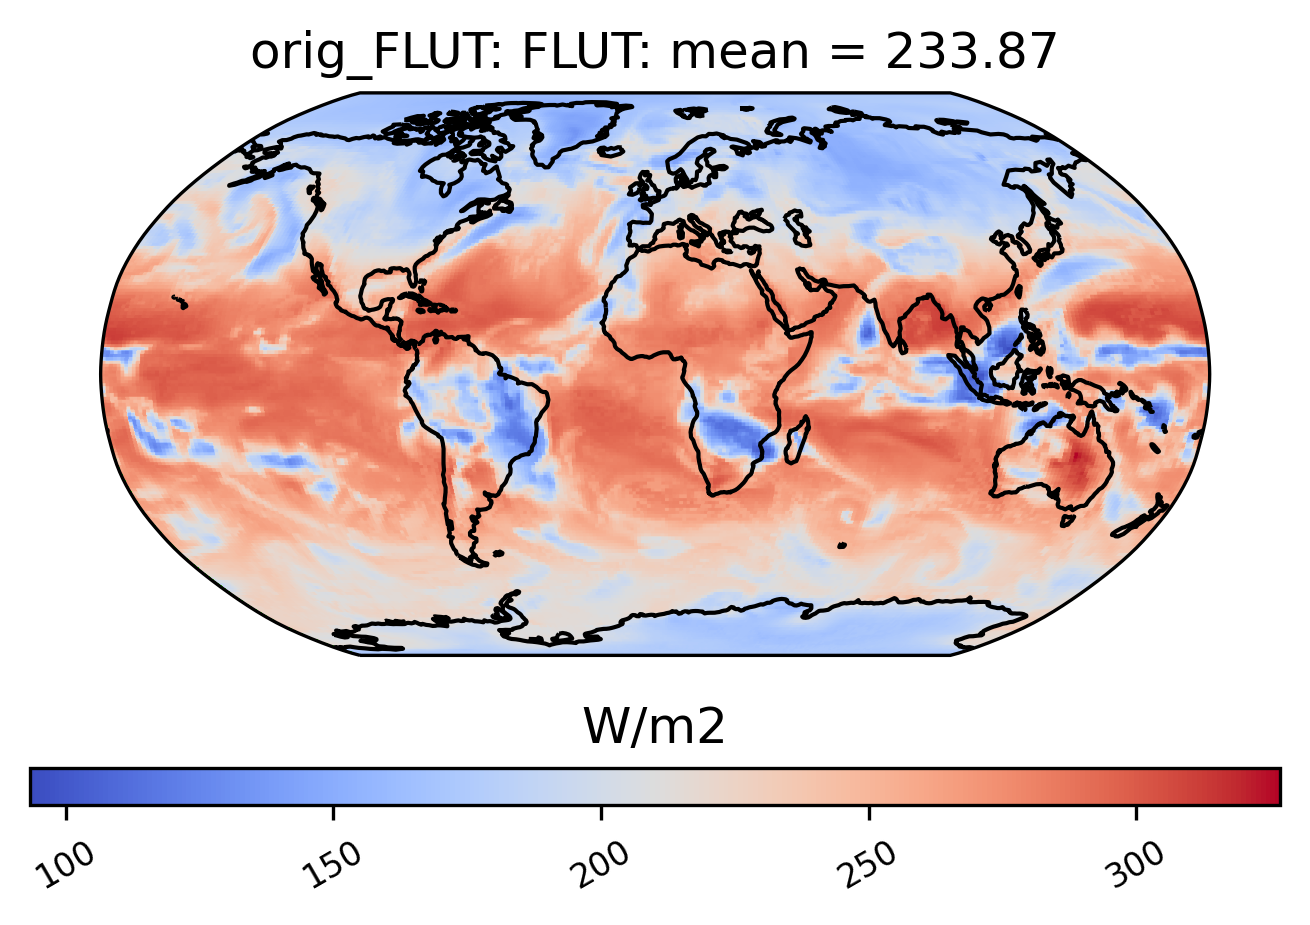

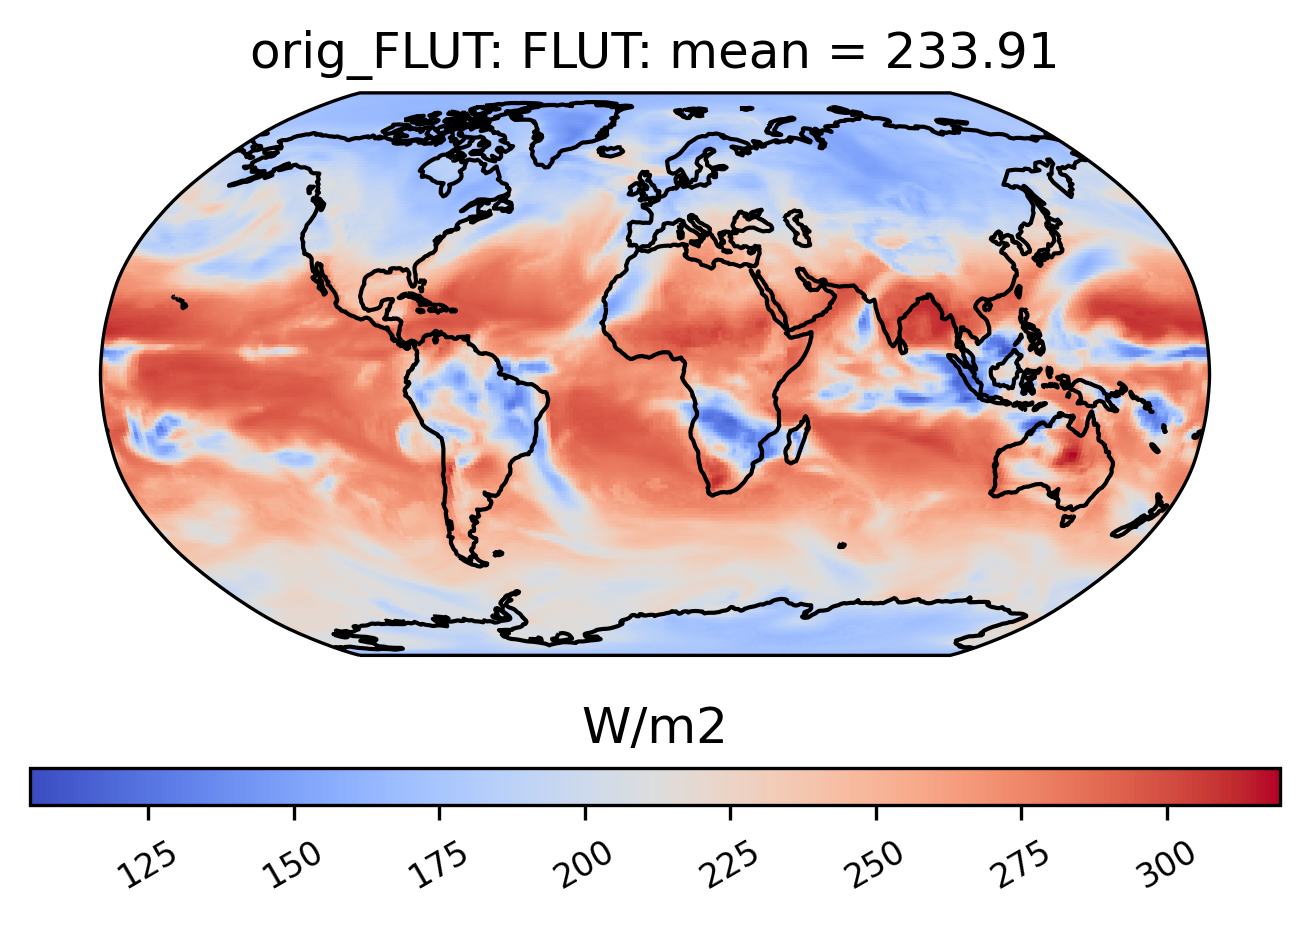

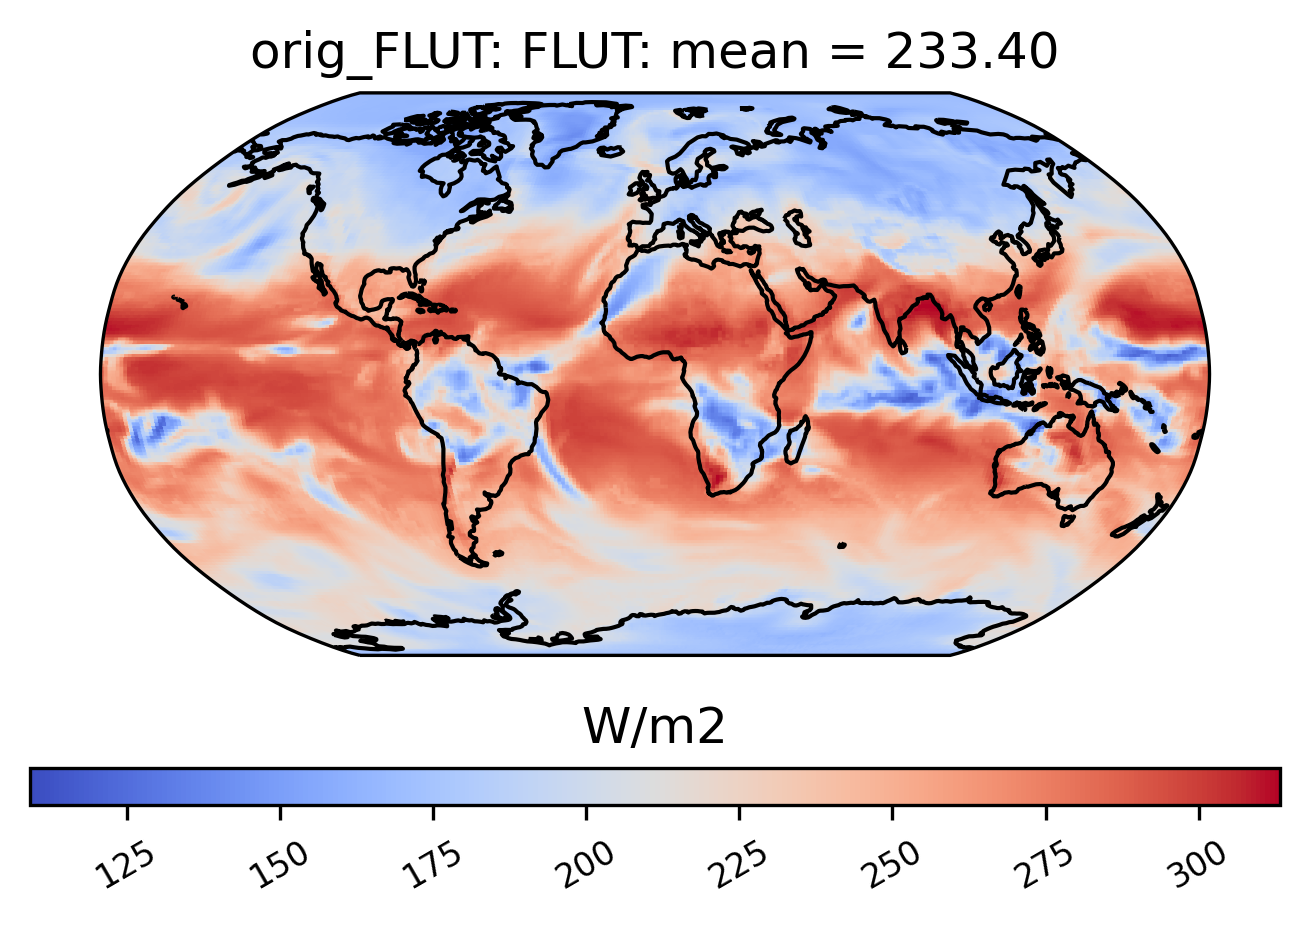

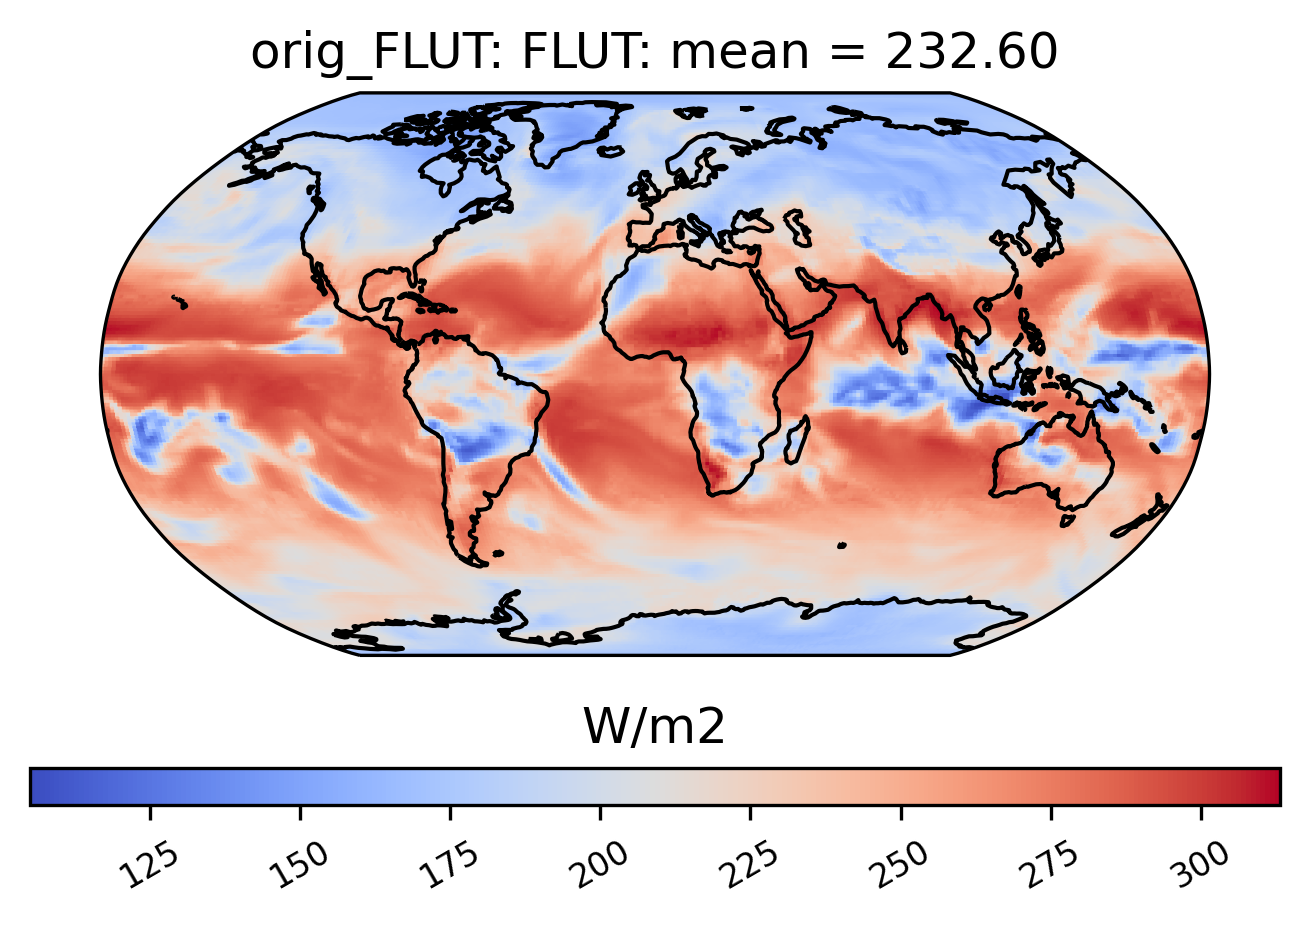

In [11]:
ldcpy.plot(cols_daily["FLUT"], "FLUT", sets=["orig_FLUT"], calc="mean", start=0, end=1)
ldcpy.plot(cols_daily["FLUT"], "FLUT", sets=["orig_FLUT"], calc="mean", start=1, end=2)
ldcpy.plot(cols_daily["FLUT"], "FLUT", sets=["orig_FLUT"], calc="mean", start=2, end=3)
ldcpy.plot(cols_daily["FLUT"], "FLUT", sets=["orig_FLUT"], calc="mean", start=3, end=4)
